In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_row', 10 )
import geopandas as gpd 
import plotly.express as px
import folium
import branca.colormap as cm 
from folium.plugins import Search

In [2]:
df = pd.read_csv("Enexis_kleinverbruiksgegevens_01012021 (3).csv" , sep=';')
df0 = df.copy() 

In [3]:
df

NETBEHEERDER NETGEBIED      STRAATNAAM POSTCODE_VAN POSTCODE_TOT  \
0       Enexis B.V.    ENEXIS         Sasdijk      4251 AA      4251 AA   
1       Enexis B.V.    ENEXIS         Sasdijk      4251 AA      4251 AA   
2       Enexis B.V.    ENEXIS         Sasdijk      4251 AB      4251 AB   
3       Enexis B.V.    ENEXIS         Sasdijk      4251 AB      4251 AB   
4       Enexis B.V.    ENEXIS         Sasdijk      4251 AC      4251 AC   
...             ...       ...             ...          ...          ...   
235937  Enexis B.V.    ENEXIS         Knolweg      9998 XE      9999 XG   
235938  Enexis B.V.    ENEXIS  Stitswerderweg      9999 XH      9999 XJ   
235939  Enexis B.V.    ENEXIS  Stitswerderweg      9999 XH      9999 XJ   
235940  Enexis B.V.    ENEXIS           Stiel      9999 XK      9999 XL   
235941  Enexis B.V.    ENEXIS           Stiel      9999 XK      9999 XL   

       WOONPLAATS LANDCODE PRODUCTSOORT VERBRUIKSSEGMENT  \
0       WERKENDAM       NL          ELK              KVB   
1       WERKENDAM       NL          GAS              KVB   
2       WERKENDAM       NL          ELK              KVB   
3       WERKENDAM       NL          GAS              KVB   
4       WERKENDAM       NL          ELK              KVB   
...           ...      ...          ...              ...   
235937  ROTTUM GN       NL          GAS              KVB   
235938  STITSWERD       NL          ELK              KVB   
235939  STITSWERD       NL          GAS              KVB   
235940  STITSWERD       NL          ELK              KVB   
235941  STITSWERD       NL          GAS              KVB   

        AANSLUITINGEN_AANTAL LEVERINGSRICHTING_PERC  FYSIEKE_STATUS_PERC  \
0                         41                  97,56                  100   
1                         40                    100                  100   
2                         14                  85,71                  100   
3                         14                    100                  100   
4                         11                  81,82                  100   
...                      ...                    ...                  ...   
235937                    12                    100                  100   
235938                    16                     50                  100   
235939                    15                    100                  100   
235940                    21                  42,86                  100   
235941                    20                    100                  100   

       SOORT_AANSLUITING_PERC SOORT_AANSLUITING SJV_GEMIDDELD  \
0                       51,22              3x25       5231,41   
1                       77,50                G4       1693,43   
2                          50              3x25       4206,43   
3                       92,86                G4       2118,64   
4                       36,36              1x25       2640,82   
...                       ...               ...           ...   
235937                  83,33                G4       4168,17   
235938                  62,50              3x25       6420,81   
235939                  86,67                G4       2457,33   
235940                  61,90              3x25       2485,81   
235941                     90                G4       1935,85   

       SJV_LAAG_TARIEF_PERC SLIMME_METER_PERC  
0                     31,44             39,02  
1                         0               NaN  
2                     49,69             71,43  
3                         0               NaN  
4                     41,38             72,73  
...                     ...               ...  
235937                    0               NaN  
235938                38,98                75  
235939                    0               NaN  
235940                42,04             76,19  
235941                    0               NaN  

[235942 rows x 17 columns]

In [4]:
df_groningen_2021 = df[df["WOONPLAATS"] == "GRONINGEN"]
df_groningen_2021

NETBEHEERDER NETGEBIED        STRAATNAAM POSTCODE_VAN POSTCODE_TOT  \
217845  Enexis B.V.    ENEXIS  Praediniussingel      9711 AA      9711 AC   
217846  Enexis B.V.    ENEXIS  Praediniussingel      9711 AA      9711 AC   
217847  Enexis B.V.    ENEXIS  Praediniussingel      9711 AD      9711 AE   
217848  Enexis B.V.    ENEXIS  Praediniussingel      9711 AD      9711 AE   
217849  Enexis B.V.    ENEXIS  Praediniussingel      9711 AG      9711 AG   
...             ...       ...               ...          ...          ...   
227019  Enexis B.V.    ENEXIS       Blauwborgje      9747 AC      9747 AJ   
227020  Enexis B.V.    ENEXIS  Paddepoelsterweg      9747 AJ      9747 AP   
227021  Enexis B.V.    ENEXIS   Crematoriumlaan      9747 AM      9747 AV   
227022  Enexis B.V.    ENEXIS      Zernikeplein      9747 AS      9747 AV   
227023  Enexis B.V.    ENEXIS         De Mudden      9747 AW      9749 TJ   

       WOONPLAATS LANDCODE PRODUCTSOORT VERBRUIKSSEGMENT  \
217845  GRONINGEN       NL          ELK              KVB   
217846  GRONINGEN       NL          GAS              KVB   
217847  GRONINGEN       NL          ELK              KVB   
217848  GRONINGEN       NL          GAS              KVB   
217849  GRONINGEN       NL          ELK              KVB   
...           ...      ...          ...              ...   
227019  GRONINGEN       NL          ELK              KVB   
227020  GRONINGEN       NL          GAS              KVB   
227021  GRONINGEN       NL          ELK              KVB   
227022  GRONINGEN       NL          GAS              KVB   
227023  GRONINGEN       NL          GAS              KVB   

        AANSLUITINGEN_AANTAL LEVERINGSRICHTING_PERC  FYSIEKE_STATUS_PERC  \
217845                    13                    100                  100   
217846                    13                    100                  100   
217847                    12                  83,33                  100   
217848                    12                    100                  100   
217849                    48                  97,92                  100   
...                      ...                    ...                  ...   
227019                    10                     40                  100   
227020                    10                    100                  100   
227021                    11                  54,55                  100   
227022                    10                    100                  100   
227023                    12                    100                  100   

       SOORT_AANSLUITING_PERC SOORT_AANSLUITING SJV_GEMIDDELD  \
217845                  53,85              3x25       6879,08   
217846                  53,85                G6       4054,31   
217847                  58,33              3x25       5443,75   
217848                     75                G6       3912,50   
217849                  47,92              1x40       3559,96   
...                       ...               ...           ...   
227019                     40              1x35       6730,50   
227020                     40               G25      14443,20   
227021                  45,45              3x80      44669,91   
227022                     40               G25      10961,70   
227023                  58,33                G4       5123,58   

       SJV_LAAG_TARIEF_PERC SLIMME_METER_PERC  
217845                36,85             69,23  
217846                    0               NaN  
217847                36,92             58,33  
217848                    0               NaN  
217849                45,47             95,83  
...                     ...               ...  
227019                44,66                80  
227020                    0               NaN  
227021                39,52             81,82  
227022                    0               NaN  
227023                    0               NaN  

[9179 rows x 17 columns]

In [5]:
df_groningen_gas_2021 = df_groningen_2021[df_groningen_2021["PRODUCTSOORT"] == "GAS"]
df_groningen_gas_2021

NETBEHEERDER NETGEBIED        STRAATNAAM POSTCODE_VAN POSTCODE_TOT  \
217846  Enexis B.V.    ENEXIS  Praediniussingel      9711 AA      9711 AC   
217848  Enexis B.V.    ENEXIS  Praediniussingel      9711 AD      9711 AE   
217850  Enexis B.V.    ENEXIS  Praediniussingel      9711 AG      9711 AG   
217852  Enexis B.V.    ENEXIS  Ganzevoortsingel      9711 AH      9711 AJ   
217854  Enexis B.V.    ENEXIS  Ganzevoortsingel      9711 AK      9711 AK   
...             ...       ...               ...          ...          ...   
227017  Enexis B.V.    ENEXIS      Gaaikemadijk      9746 TM      9746 TN   
227018  Enexis B.V.    ENEXIS       Zernikelaan      9747 AA      9747 AH   
227020  Enexis B.V.    ENEXIS  Paddepoelsterweg      9747 AJ      9747 AP   
227022  Enexis B.V.    ENEXIS      Zernikeplein      9747 AS      9747 AV   
227023  Enexis B.V.    ENEXIS         De Mudden      9747 AW      9749 TJ   

       WOONPLAATS LANDCODE PRODUCTSOORT VERBRUIKSSEGMENT  \
217846  GRONINGEN       NL          GAS              KVB   
217848  GRONINGEN       NL          GAS              KVB   
217850  GRONINGEN       NL          GAS              KVB   
217852  GRONINGEN       NL          GAS              KVB   
217854  GRONINGEN       NL          GAS              KVB   
...           ...      ...          ...              ...   
227017  GRONINGEN       NL          GAS              KVB   
227018  GRONINGEN       NL          GAS              KVB   
227020  GRONINGEN       NL          GAS              KVB   
227022  GRONINGEN       NL          GAS              KVB   
227023  GRONINGEN       NL          GAS              KVB   

        AANSLUITINGEN_AANTAL LEVERINGSRICHTING_PERC  FYSIEKE_STATUS_PERC  \
217846                    13                    100                  100   
217848                    12                    100                  100   
217850                    48                    100                  100   
217852                    30                    100                  100   
217854                    14                    100                  100   
...                      ...                    ...                  ...   
227017                    13                    100                  100   
227018                    11                    100                  100   
227020                    10                    100                  100   
227022                    10                    100                  100   
227023                    12                    100                  100   

       SOORT_AANSLUITING_PERC SOORT_AANSLUITING SJV_GEMIDDELD  \
217846                  53,85                G6       4054,31   
217848                     75                G6       3912,50   
217850                  91,67                G4       1870,94   
217852                    100                G4        967,97   
217854                    100                G4          1492   
...                       ...               ...           ...   
227017                  69,23                G4       8027,08   
227018                  63,64                G4       3910,64   
227020                     40               G25      14443,20   
227022                     40               G25      10961,70   
227023                  58,33                G4       5123,58   

       SJV_LAAG_TARIEF_PERC SLIMME_METER_PERC  
217846                    0               NaN  
217848                    0               NaN  
217850                    0               NaN  
217852                    0               NaN  
217854                    0               NaN  
...                     ...               ...  
227017                    0               NaN  
227018                    0               NaN  
227020                    0               NaN  
227022                    0               NaN  
227023                    0               NaN  

[4485 rows x 17 columns]

In [6]:
df_groningen_gas_2021['SJV_GEMIDDELD'] = df_groningen_gas_2021['SJV_GEMIDDELD'].str.replace(',', '.').astype(float)
df_groningen_gas_2021

NETBEHEERDER NETGEBIED        STRAATNAAM POSTCODE_VAN POSTCODE_TOT  \
217846  Enexis B.V.    ENEXIS  Praediniussingel      9711 AA      9711 AC   
217848  Enexis B.V.    ENEXIS  Praediniussingel      9711 AD      9711 AE   
217850  Enexis B.V.    ENEXIS  Praediniussingel      9711 AG      9711 AG   
217852  Enexis B.V.    ENEXIS  Ganzevoortsingel      9711 AH      9711 AJ   
217854  Enexis B.V.    ENEXIS  Ganzevoortsingel      9711 AK      9711 AK   
...             ...       ...               ...          ...          ...   
227017  Enexis B.V.    ENEXIS      Gaaikemadijk      9746 TM      9746 TN   
227018  Enexis B.V.    ENEXIS       Zernikelaan      9747 AA      9747 AH   
227020  Enexis B.V.    ENEXIS  Paddepoelsterweg      9747 AJ      9747 AP   
227022  Enexis B.V.    ENEXIS      Zernikeplein      9747 AS      9747 AV   
227023  Enexis B.V.    ENEXIS         De Mudden      9747 AW      9749 TJ   

       WOONPLAATS LANDCODE PRODUCTSOORT VERBRUIKSSEGMENT  \
217846  GRONINGEN       NL          GAS              KVB   
217848  GRONINGEN       NL          GAS              KVB   
217850  GRONINGEN       NL          GAS              KVB   
217852  GRONINGEN       NL          GAS              KVB   
217854  GRONINGEN       NL          GAS              KVB   
...           ...      ...          ...              ...   
227017  GRONINGEN       NL          GAS              KVB   
227018  GRONINGEN       NL          GAS              KVB   
227020  GRONINGEN       NL          GAS              KVB   
227022  GRONINGEN       NL          GAS              KVB   
227023  GRONINGEN       NL          GAS              KVB   

        AANSLUITINGEN_AANTAL LEVERINGSRICHTING_PERC  FYSIEKE_STATUS_PERC  \
217846                    13                    100                  100   
217848                    12                    100                  100   
217850                    48                    100                  100   
217852                    30                    100                  100   
217854                    14                    100                  100   
...                      ...                    ...                  ...   
227017                    13                    100                  100   
227018                    11                    100                  100   
227020                    10                    100                  100   
227022                    10                    100                  100   
227023                    12                    100                  100   

       SOORT_AANSLUITING_PERC SOORT_AANSLUITING  SJV_GEMIDDELD  \
217846                  53,85                G6       4054.310   
217848                     75                G6       3912.500   
217850                  91,67                G4       1870.940   
217852                    100                G4        967.970   
217854                    100                G4       1492.000   
...                       ...               ...            ...   
227017                  69,23                G4       8027.080   
227018                  63,64                G4       3910.640   
227020                     40               G25      14443.200   
227022                     40               G25      10961.700   
227023                  58,33                G4       5123.580   

       SJV_LAAG_TARIEF_PERC SLIMME_METER_PERC  
217846                    0               NaN  
217848                    0               NaN  
217850                    0               NaN  
217852                    0               NaN  
217854                    0               NaN  
...                     ...               ...  
227017                    0               NaN  
227018                    0               NaN  
227020                    0               NaN  
227022                    0               NaN  
227023                    0               NaN  

[4485 rows x 17 columns]

In [7]:
df_groningen_gas_2021.SJV_GEMIDDELD


217846    4054.310
217848    3912.500
217850    1870.940
217852     967.970
217854    1492.000
            ...   
227017    8027.080
227018    3910.640
227020   14443.200
227022   10961.700
227023    5123.580
Name: SJV_GEMIDDELD, Length: 4485, dtype: float64

In [8]:
df_groningen_gas_2021 = df_groningen_gas_2021[['POSTCODE_VAN','POSTCODE_TOT','AANSLUITINGEN_AANTAL', 'SJV_GEMIDDELD']]
df_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
217846      9711 AA      9711 AC                    13       4054.310
217848      9711 AD      9711 AE                    12       3912.500
217850      9711 AG      9711 AG                    48       1870.940
217852      9711 AH      9711 AJ                    30        967.970
217854      9711 AK      9711 AK                    14       1492.000
...             ...          ...                   ...            ...
227017      9746 TM      9746 TN                    13       8027.080
227018      9747 AA      9747 AH                    11       3910.640
227020      9747 AJ      9747 AP                    10      14443.200
227022      9747 AS      9747 AV                    10      10961.700
227023      9747 AW      9749 TJ                    12       5123.580

[4485 rows x 4 columns]

In [9]:
df_groningen_gas_2021['POSTCODE_VAN'] = df_groningen_gas_2021['POSTCODE_VAN'].str.replace(' ','')
df_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
217846       9711AA      9711 AC                    13       4054.310
217848       9711AD      9711 AE                    12       3912.500
217850       9711AG      9711 AG                    48       1870.940
217852       9711AH      9711 AJ                    30        967.970
217854       9711AK      9711 AK                    14       1492.000
...             ...          ...                   ...            ...
227017       9746TM      9746 TN                    13       8027.080
227018       9747AA      9747 AH                    11       3910.640
227020       9747AJ      9747 AP                    10      14443.200
227022       9747AS      9747 AV                    10      10961.700
227023       9747AW      9749 TJ                    12       5123.580

[4485 rows x 4 columns]

In [10]:
 df_groningen_gas_2021[df_groningen_gas_2021['POSTCODE_VAN'] == '9722BP']


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
221682       9722BP      9722 BP                    12         96.250

In [11]:
 df_groningen_gas_2021[df_groningen_gas_2021['POSTCODE_VAN'] == '9722BN']

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
221680       9722BN      9722 BN                    16         31.250

In [12]:
postcode_grenzen = gpd.read_file("CBS_PC6_2016_v2.shp")

In [13]:
postcode_grenzen

Postcode  INWONER    MAN  VROUW  INW_014  INW_1524  INW_2544  INW_4564  \
0        1011AB   -99997 -99997 -99997   -99997    -99997    -99997    -99997   
1        1011AC       20     10     10   -99997    -99997         5         5   
2        1011AD   -99997 -99997 -99997   -99997    -99997    -99997    -99997   
3        1011AE   -99997 -99997 -99997   -99997    -99997    -99997    -99997   
4        1011AG        5      5 -99997   -99997    -99997         5    -99997   
...         ...      ...    ...    ...      ...       ...       ...       ...   
455613   9999XG       10      5 -99997   -99997    -99997    -99997         5   
455614   9999XH       10      5 -99997   -99997    -99997    -99997    -99997   
455615   9999XJ       20     10     10   -99997    -99997    -99997        10   
455616   9999XK       15      5      5   -99997    -99997    -99997         5   
455617   9999XL       20     10     10   -99997    -99997    -99997        10   

        INW_65PL  GEBOORTE  ...  AV5_ZIEK_E  AV10ZIEK_E  AV20ZIEK_E  \
0         -99997    -99997  ...  -99997.000  -99997.000  -99997.000   
1              5    -99997  ...       1.000       6.000      12.000   
2         -99997    -99997  ...  -99997.000  -99997.000  -99997.000   
3         -99997    -99997  ...  -99997.000  -99997.000  -99997.000   
4         -99997    -99997  ...       1.000       7.000      13.000   
...          ...       ...  ...         ...         ...         ...   
455613    -99997    -99997  ...       0.000       0.000       1.000   
455614    -99997    -99997  ...       0.000       0.000       1.000   
455615         5    -99997  ...       0.000       0.000       1.300   
455616    -99997    -99997  ...       0.000       0.000       1.000   
455617         5    -99997  ...       0.000       0.000       1.000   

        AFS_ZIEK_I  AV5_ZIEK_I  AV10ZIEK_I  AV20ZIEK_I  AFS_APOTH  AFS_HAPOST  \
0       -99997.000  -99997.000  -99997.000  -99997.000 -99997.000  -99997.000   
1            2.100       2.000       8.000      15.000      1.200       3.500   
2       -99997.000  -99997.000  -99997.000  -99997.000 -99997.000  -99997.000   
3       -99997.000  -99997.000  -99997.000  -99997.000 -99997.000  -99997.000   
4            1.400       2.000       9.000      17.000      0.300       2.700   
...            ...         ...         ...         ...        ...         ...   
455613       8.500       0.000       1.000       2.000 -99997.000       8.900   
455614       8.300       0.000       1.000       2.000 -99997.000       8.600   
455615       7.400       0.000       1.000       2.300      5.100       7.800   
455616       8.400       0.000       1.000       2.000      5.600       8.800   
455617       8.400       0.000       1.000       2.000      5.600       8.800   

                                                 geometry  
0       POLYGON ((122176.792 487929.514, 122180.323 48...  
1       POLYGON ((122392.287 487876.886, 122420.352 48...  
2       POLYGON ((122097.418 487812.355, 122100.396 48...  
3       MULTIPOLYGON (((122641.343 487605.133, 122585....  
4       POLYGON ((122026.632 487690.998, 122032.23 487...  
...                                                   ...  
455613  POLYGON ((235730.815 598099.336, 235783.415 59...  
455614  MULTIPOLYGON (((235967.412 596285.322, 235960....  
455615  POLYGON ((234888.566 598002.879, 235571.823 59...  
455616  POLYGON ((235708.216 597883.634, 235709.435 59...  
455617  POLYGON ((236339.922 597914.512, 236174.288 59...  

[455618 rows x 131 columns]

In [14]:
postcode_grenzen= postcode_grenzen[['Postcode', 'geometry']]
postcode_grenzen

Postcode                                           geometry
0        1011AB  POLYGON ((122176.792 487929.514, 122180.323 48...
1        1011AC  POLYGON ((122392.287 487876.886, 122420.352 48...
2        1011AD  POLYGON ((122097.418 487812.355, 122100.396 48...
3        1011AE  MULTIPOLYGON (((122641.343 487605.133, 122585....
4        1011AG  POLYGON ((122026.632 487690.998, 122032.23 487...
...         ...                                                ...
455613   9999XG  POLYGON ((235730.815 598099.336, 235783.415 59...
455614   9999XH  MULTIPOLYGON (((235967.412 596285.322, 235960....
455615   9999XJ  POLYGON ((234888.566 598002.879, 235571.823 59...
455616   9999XK  POLYGON ((235708.216 597883.634, 235709.435 59...
455617   9999XL  POLYGON ((236339.922 597914.512, 236174.288 59...

[455618 rows x 2 columns]

In [15]:
df_groningen_gas_2021['POSTCODE_TOT'] = df_groningen_gas_2021['POSTCODE_TOT'].str.replace(' ','' )
df_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
217846       9711AA       9711AC                    13       4054.310
217848       9711AD       9711AE                    12       3912.500
217850       9711AG       9711AG                    48       1870.940
217852       9711AH       9711AJ                    30        967.970
217854       9711AK       9711AK                    14       1492.000
...             ...          ...                   ...            ...
227017       9746TM       9746TN                    13       8027.080
227018       9747AA       9747AH                    11       3910.640
227020       9747AJ       9747AP                    10      14443.200
227022       9747AS       9747AV                    10      10961.700
227023       9747AW       9749TJ                    12       5123.580

[4485 rows x 4 columns]

In [16]:
df_groningen_gas_2021_van = pd.merge(df_groningen_gas_2021,postcode_grenzen, left_on= 'POSTCODE_VAN' , right_on='Postcode')
df_groningen_gas_2021_van

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AA   
1          9711AD       9711AE                    12       3912.500   9711AD   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AH   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
4461       9746TM       9746TN                    13       8027.080   9746TM   
4462       9747AA       9747AH                    11       3910.640   9747AA   
4463       9747AJ       9747AP                    10      14443.200   9747AJ   
4464       9747AS       9747AV                    10      10961.700   9747AS   
4465       9747AW       9749TJ                    12       5123.580   9747AW   

                                               geometry  
0     POLYGON ((233438.109 581446.772, 233438.908 58...  
1     POLYGON ((233374.874 581490.712, 233378.106 58...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233493.931 581473.687, 233494.015 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
4461  POLYGON ((228517.505 585274.473, 228514.398 58...  
4462  MULTIPOLYGON (((232089.205 584026.538, 232091....  
4463  MULTIPOLYGON (((231683.87 584318.182, 231685.6...  
4464  POLYGON ((231723.102 584673.51, 231727.386 584...  
4465  POLYGON ((231315.457 584855.846, 231320.203 58...  

[4466 rows x 6 columns]

In [17]:
df_groningen_gas_2021_tot = pd.merge(df_groningen_gas_2021,postcode_grenzen, left_on= 'POSTCODE_TOT' , right_on='Postcode')
df_groningen_gas_2021_tot

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AC   
1          9711AD       9711AE                    12       3912.500   9711AE   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AJ   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
4464       9746TM       9746TN                    13       8027.080   9746TN   
4465       9747AA       9747AH                    11       3910.640   9747AH   
4466       9747AJ       9747AP                    10      14443.200   9747AP   
4467       9747AS       9747AV                    10      10961.700   9747AV   
4468       9747AW       9749TJ                    12       5123.580   9749TJ   

                                               geometry  
0     POLYGON ((233400.336 581463.444, 233405.852 58...  
1     POLYGON ((233357.577 581516.19, 233358.931 581...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233424.711 581546.897, 233438.119 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
4464  MULTIPOLYGON (((231199.994 584030.946, 231232....  
4465  MULTIPOLYGON (((231785.912 584948.309, 231791....  
4466  MULTIPOLYGON (((231636.934 584614.044, 231527....  
4467  POLYGON ((231438.345 585352.36, 231496.53 5852...  
4468  POLYGON ((228383.34 580247.12, 228394.61 58024...  

[4469 rows x 6 columns]

In [18]:
df_groningen_gas_2021_merge = pd.concat([df_groningen_gas_2021_van, df_groningen_gas_2021_tot], ignore_index =True)
df_groningen_gas_2021_merge


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AA   
1          9711AD       9711AE                    12       3912.500   9711AD   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AH   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
8930       9746TM       9746TN                    13       8027.080   9746TN   
8931       9747AA       9747AH                    11       3910.640   9747AH   
8932       9747AJ       9747AP                    10      14443.200   9747AP   
8933       9747AS       9747AV                    10      10961.700   9747AV   
8934       9747AW       9749TJ                    12       5123.580   9749TJ   

                                               geometry  
0     POLYGON ((233438.109 581446.772, 233438.908 58...  
1     POLYGON ((233374.874 581490.712, 233378.106 58...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233493.931 581473.687, 233494.015 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
8930  MULTIPOLYGON (((231199.994 584030.946, 231232....  
8931  MULTIPOLYGON (((231785.912 584948.309, 231791....  
8932  MULTIPOLYGON (((231636.934 584614.044, 231527....  
8933  POLYGON ((231438.345 585352.36, 231496.53 5852...  
8934  POLYGON ((228383.34 580247.12, 228394.61 58024...  

[8935 rows x 6 columns]

In [19]:
df_groningen_gas_2021= df_groningen_gas_2021_merge.drop_duplicates()
df_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AA   
1          9711AD       9711AE                    12       3912.500   9711AD   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AH   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
8930       9746TM       9746TN                    13       8027.080   9746TN   
8931       9747AA       9747AH                    11       3910.640   9747AH   
8932       9747AJ       9747AP                    10      14443.200   9747AP   
8933       9747AS       9747AV                    10      10961.700   9747AV   
8934       9747AW       9749TJ                    12       5123.580   9749TJ   

                                               geometry  
0     POLYGON ((233438.109 581446.772, 233438.908 58...  
1     POLYGON ((233374.874 581490.712, 233378.106 58...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233493.931 581473.687, 233494.015 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
8930  MULTIPOLYGON (((231199.994 584030.946, 231232....  
8931  MULTIPOLYGON (((231785.912 584948.309, 231791....  
8932  MULTIPOLYGON (((231636.934 584614.044, 231527....  
8933  POLYGON ((231438.345 585352.36, 231496.53 5852...  
8934  POLYGON ((228383.34 580247.12, 228394.61 58024...  

[5048 rows x 6 columns]

In [20]:
 df_groningen_gas_2021[df_groningen_gas_2021['POSTCODE_VAN'] == '9722BP']


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
1875       9722BP       9722BP                    12         96.250   9722BP   

                                               geometry  
1875  POLYGON ((235668.192 579395.808, 235647.297 57...

In [21]:
df_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AA   
1          9711AD       9711AE                    12       3912.500   9711AD   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AH   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
8930       9746TM       9746TN                    13       8027.080   9746TN   
8931       9747AA       9747AH                    11       3910.640   9747AH   
8932       9747AJ       9747AP                    10      14443.200   9747AP   
8933       9747AS       9747AV                    10      10961.700   9747AV   
8934       9747AW       9749TJ                    12       5123.580   9749TJ   

                                               geometry  
0     POLYGON ((233438.109 581446.772, 233438.908 58...  
1     POLYGON ((233374.874 581490.712, 233378.106 58...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233493.931 581473.687, 233494.015 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
8930  MULTIPOLYGON (((231199.994 584030.946, 231232....  
8931  MULTIPOLYGON (((231785.912 584948.309, 231791....  
8932  MULTIPOLYGON (((231636.934 584614.044, 231527....  
8933  POLYGON ((231438.345 585352.36, 231496.53 5852...  
8934  POLYGON ((228383.34 580247.12, 228394.61 58024...  

[5048 rows x 6 columns]

In [22]:
 df_groningen_gas_2021[df_groningen_gas_2021['Postcode'] == '9711AC']


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
4466       9711AA       9711AC                    13       4054.310   9711AC   

                                               geometry  
4466  POLYGON ((233400.336 581463.444, 233405.852 58...

In [23]:
df_groningen_gas_2021.SJV_GEMIDDELD.describe()

count    5048.000
mean     1725.684
std      1354.986
min        12.920
25%      1074.460
50%      1386.495
75%      1887.132
max     14641.530
Name: SJV_GEMIDDELD, dtype: float64

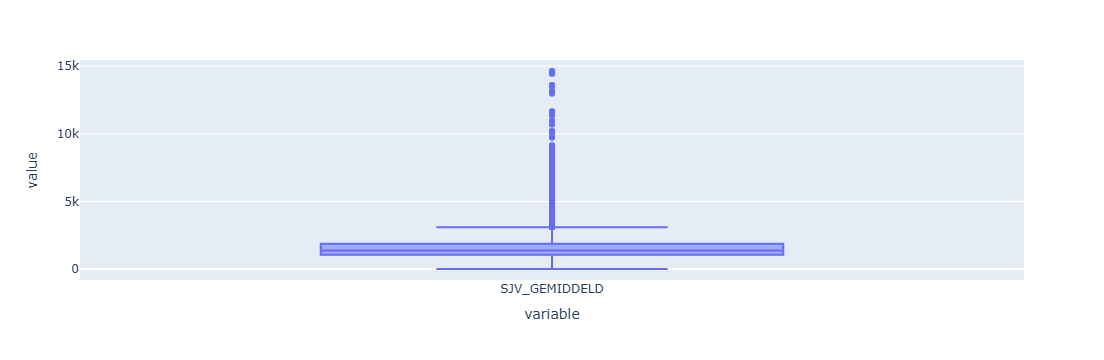

In [24]:
px.box(df_groningen_gas_2021.SJV_GEMIDDELD)

In [25]:
gdf_groningen_gas_2021 = gpd.GeoDataFrame(df_groningen_gas_2021, geometry = "geometry")
gdf_groningen_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0          9711AA       9711AC                    13       4054.310   9711AA   
1          9711AD       9711AE                    12       3912.500   9711AD   
2          9711AG       9711AG                    48       1870.940   9711AG   
3          9711AH       9711AJ                    30        967.970   9711AH   
4          9711AK       9711AK                    14       1492.000   9711AK   
...           ...          ...                   ...            ...      ...   
8930       9746TM       9746TN                    13       8027.080   9746TN   
8931       9747AA       9747AH                    11       3910.640   9747AH   
8932       9747AJ       9747AP                    10      14443.200   9747AP   
8933       9747AS       9747AV                    10      10961.700   9747AV   
8934       9747AW       9749TJ                    12       5123.580   9749TJ   

                                               geometry  
0     POLYGON ((233438.109 581446.772, 233438.908 58...  
1     POLYGON ((233374.874 581490.712, 233378.106 58...  
2     MULTIPOLYGON (((233440.703 581357.647, 233417....  
3     POLYGON ((233493.931 581473.687, 233494.015 58...  
4     POLYGON ((233364.15 581578.063, 233364.382 581...  
...                                                 ...  
8930  MULTIPOLYGON (((231199.994 584030.946, 231232....  
8931  MULTIPOLYGON (((231785.912 584948.309, 231791....  
8932  MULTIPOLYGON (((231636.934 584614.044, 231527....  
8933  POLYGON ((231438.345 585352.36, 231496.53 5852...  
8934  POLYGON ((228383.34 580247.12, 228394.61 58024...  

[5048 rows x 6 columns]

<Axes: >

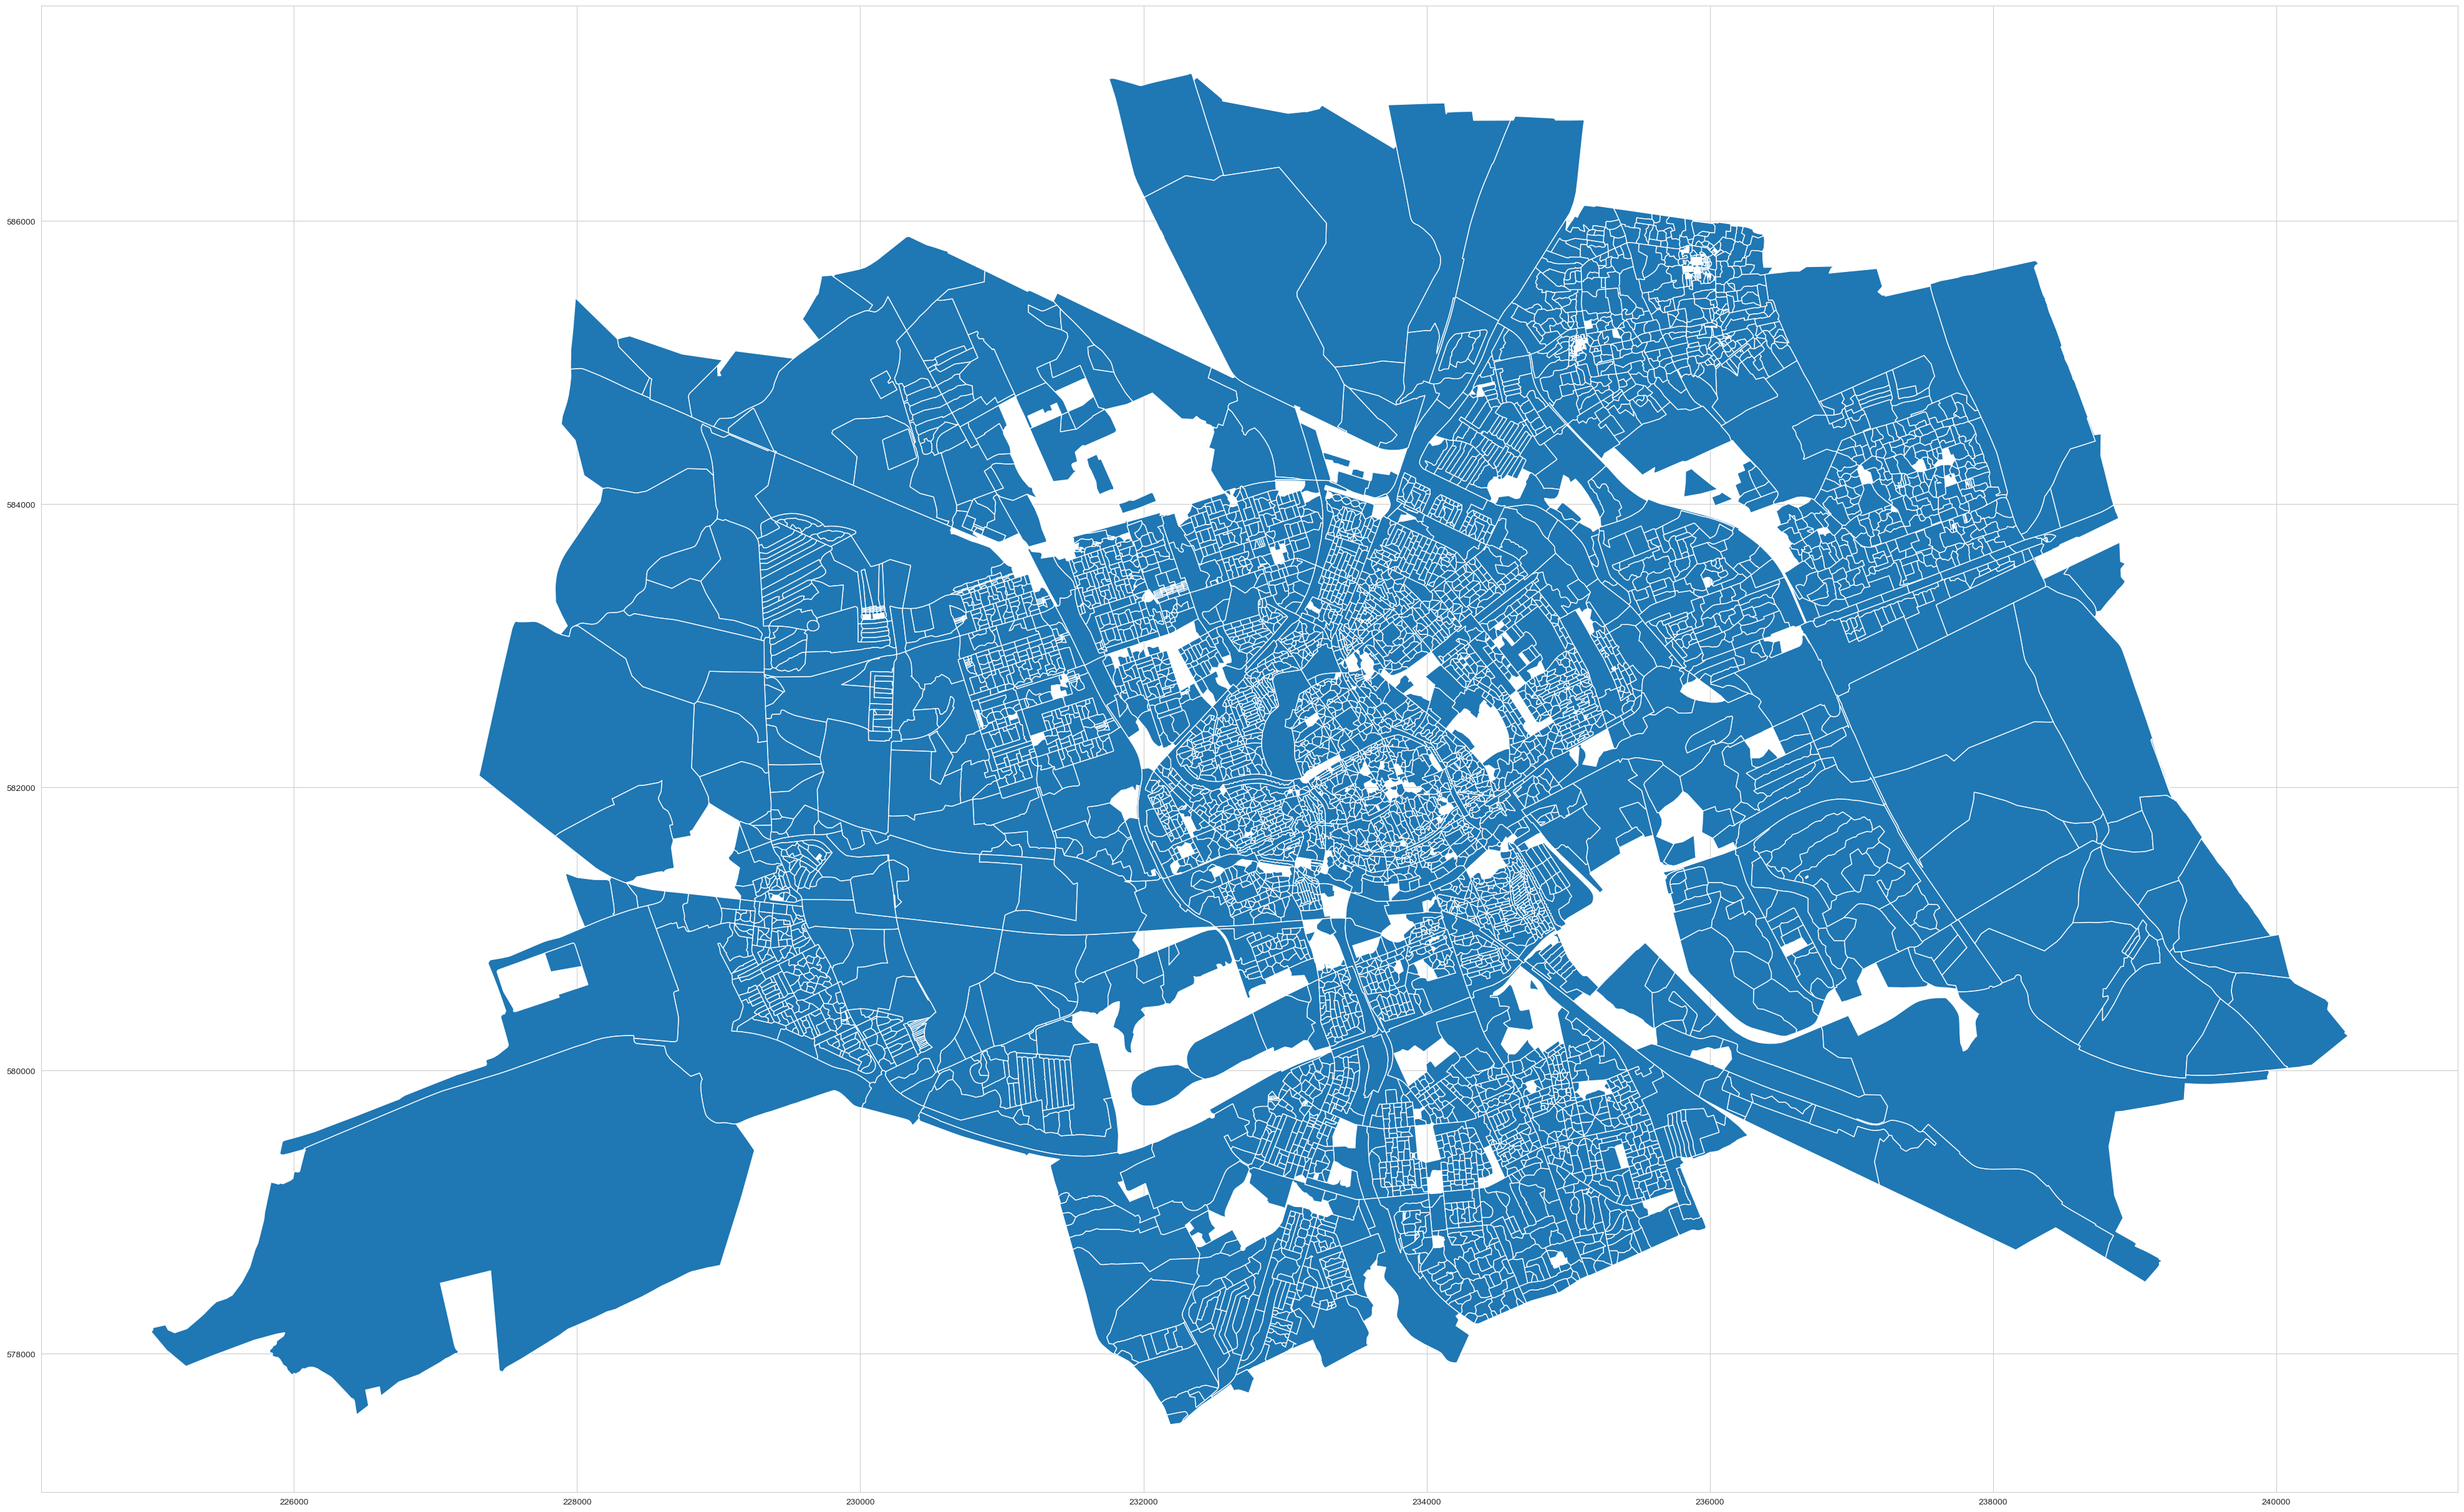

In [26]:
fig, ax = plt.subplots(figsize=(50, 50))
gdf_groningen_gas_2021.plot(ax=ax)

In [27]:
df_groningen_gas_2021.SJV_GEMIDDELD.describe()

count    5048.000
mean     1725.684
std      1354.986
min        12.920
25%      1074.460
50%      1386.495
75%      1887.132
max     14641.530
Name: SJV_GEMIDDELD, dtype: float64

In [28]:
from folium.plugins import Search

# Harita nesnesi oluşturuluyor
m = folium.Map(location=[53.2194, 6.5665], zoom_start=12)

# Renkleri aralıklarına göre ayarlayan fonksiyon
def get_color(value):
    if value < 1050.838:
        return 'green'
    elif 1050.838 <= value < 1349.220:
        return 'yellow'
    elif 1349.220 <= value < 1770.665:
        return 'blue'
    else:
        return 'red'

# GeoJson ile görselleştirme
geojson = folium.GeoJson(
    gdf_groningen_gas_2021,  # GeoDataFrame veya GeoJSON objeniz
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['SJV_GEMIDDELD']),  # Renklendirme fonksiyonu
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['POSTCODE_VAN', 'SJV_GEMIDDELD'],  # Tooltip'te göstereceğiniz sütunlar
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],  # Tooltip için alias'lar
        localize=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['POSTCODE_VAN', 'SJV_GEMIDDELD'],  # Popup'ta göstereceğiniz sütunlar
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],  # Popup için alias'lar
        localize=True
    )
).add_to(m)

# Renk aralığı (legend) oluşturma
colormap = cm.StepColormap(
    colors=['green', 'yellow', 'blue', 'red'],  # Renkler
    vmin=12.920,  # Minimum değer
    vmax=4000,  # Maksimum değer (haritanızdaki en yüksek değerden biraz fazla olabilir)
    index=[12.920, 1050.838, 1349.220, 1770.665],  # Sınır değerler
    caption='GASVERBUIK (m3)'  # Başlık
)

# Haritaya renk aralığını ekleyin
colormap.add_to(m)

# Posta kodlarına göre arama ekleyin
search = Search(
    layer=geojson,  # Aranacak GeoJson katmanı
    search_label='POSTCODE_VAN',  # Aranacak sütun (posta kodu)
    placeholder='ZOEKEN POSTCODE',  # Arama kutusu için yer tutucu
    collapsed=False , # Arama kutusu varsayılan olarak açık olsun mu
    search_zoom = 20
).add_to(m)

# Haritayı kaydedin
m.save('kleur_van_kaart_gas.html')

In [29]:
df_hren_gas_2021 = pd.read_csv('df_haren_gas_2021.csv')
df_hren_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0        9751 AA      9751 AA                    16       2844.440
1        9751 AB      9751 AB                    16       2743.810
2        9751 AC      9751 AC                    10       2545.300
3        9751 AD      9751 AE                    21       2484.900
4        9751 AG      9751 AG                    12       2834.420
..           ...          ...                   ...            ...
465      9753 KX      9753 KX                    19       1361.470
466      9753 KZ      9753 KZ                    24       1490.710
467      9753 LA      9753 TA                    25       3845.960
468      9753 TB      9753 TB                    19       2876.680
469      9766 WW      9766 ZZ                    11        683.180

[470 rows x 4 columns]

In [30]:
df_hren_gas_2021['POSTCODE_TOT'] = df_hren_gas_2021['POSTCODE_TOT'].str.replace(' ','' )
df_hren_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0        9751 AA       9751AA                    16       2844.440
1        9751 AB       9751AB                    16       2743.810
2        9751 AC       9751AC                    10       2545.300
3        9751 AD       9751AE                    21       2484.900
4        9751 AG       9751AG                    12       2834.420
..           ...          ...                   ...            ...
465      9753 KX       9753KX                    19       1361.470
466      9753 KZ       9753KZ                    24       1490.710
467      9753 LA       9753TA                    25       3845.960
468      9753 TB       9753TB                    19       2876.680
469      9766 WW       9766ZZ                    11        683.180

[470 rows x 4 columns]

In [31]:
df_hren_gas_2021['POSTCODE_VAN'] = df_hren_gas_2021['POSTCODE_VAN'].str.replace(' ','' )
df_hren_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0         9751AA       9751AA                    16       2844.440
1         9751AB       9751AB                    16       2743.810
2         9751AC       9751AC                    10       2545.300
3         9751AD       9751AE                    21       2484.900
4         9751AG       9751AG                    12       2834.420
..           ...          ...                   ...            ...
465       9753KX       9753KX                    19       1361.470
466       9753KZ       9753KZ                    24       1490.710
467       9753LA       9753TA                    25       3845.960
468       9753TB       9753TB                    19       2876.680
469       9766WW       9766ZZ                    11        683.180

[470 rows x 4 columns]

In [32]:
df_hren_gas_2021_van = pd.merge(df_hren_gas_2021,postcode_grenzen, left_on= 'POSTCODE_VAN' , right_on='Postcode' )
df_hren_gas_2021_van


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9751AA       9751AA                    16       2844.440   9751AA   
1         9751AB       9751AB                    16       2743.810   9751AB   
2         9751AC       9751AC                    10       2545.300   9751AC   
3         9751AD       9751AE                    21       2484.900   9751AD   
4         9751AG       9751AG                    12       2834.420   9751AG   
..           ...          ...                   ...            ...      ...   
455       9753KV       9753KW                    39       1617.000   9753KV   
456       9753KX       9753KX                    19       1361.470   9753KX   
457       9753KZ       9753KZ                    24       1490.710   9753KZ   
458       9753LA       9753TA                    25       3845.960   9753LA   
459       9753TB       9753TB                    19       2876.680   9753TB   

                                              geometry  
0    POLYGON ((236077.523 577401.793, 236090.143 57...  
1    POLYGON ((236283.689 577265.225, 236290.074 57...  
2    POLYGON ((236185.277 577452.009, 236187.891 57...  
3    POLYGON ((236362.57 577305.235, 236362.633 577...  
4    POLYGON ((236622.699 577198.767, 236628.155 57...  
..                                                 ...  
455  POLYGON ((238238.913 576758.568, 238244.97 576...  
456  POLYGON ((238283.627 576893.045, 238293.414 57...  
457  POLYGON ((238378.202 576933.28, 238379.437 576...  
458  POLYGON ((238509.959 577006.176, 238537.143 57...  
459  POLYGON ((238324.359 576566.075, 238329.303 57...  

[460 rows x 6 columns]

In [33]:
df_hren_gas_2021_tot = pd.merge(df_hren_gas_2021,postcode_grenzen, left_on= 'POSTCODE_TOT' , right_on='Postcode' )
df_hren_gas_2021_tot


POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9751AA       9751AA                    16       2844.440   9751AA   
1         9751AB       9751AB                    16       2743.810   9751AB   
2         9751AC       9751AC                    10       2545.300   9751AC   
3         9751AD       9751AE                    21       2484.900   9751AE   
4         9751AG       9751AG                    12       2834.420   9751AG   
..           ...          ...                   ...            ...      ...   
458       9753KV       9753KW                    39       1617.000   9753KW   
459       9753KX       9753KX                    19       1361.470   9753KX   
460       9753KZ       9753KZ                    24       1490.710   9753KZ   
461       9753LA       9753TA                    25       3845.960   9753TA   
462       9753TB       9753TB                    19       2876.680   9753TB   

                                              geometry  
0    POLYGON ((236077.523 577401.793, 236090.143 57...  
1    POLYGON ((236283.689 577265.225, 236290.074 57...  
2    POLYGON ((236185.277 577452.009, 236187.891 57...  
3    POLYGON ((236438.982 577096.34, 236462.341 577...  
4    POLYGON ((236622.699 577198.767, 236628.155 57...  
..                                                 ...  
458  MULTIPOLYGON (((238477.527 576795.21, 238464.4...  
459  POLYGON ((238283.627 576893.045, 238293.414 57...  
460  POLYGON ((238378.202 576933.28, 238379.437 576...  
461  POLYGON ((237897.45 576080.184, 237878.308 576...  
462  POLYGON ((238324.359 576566.075, 238329.303 57...  

[463 rows x 6 columns]

In [34]:
df_haren_gas_2021_merge = pd.concat([df_hren_gas_2021_van, df_hren_gas_2021_tot], ignore_index =True)
df_haren_gas_2021_merge

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9751AA       9751AA                    16       2844.440   9751AA   
1         9751AB       9751AB                    16       2743.810   9751AB   
2         9751AC       9751AC                    10       2545.300   9751AC   
3         9751AD       9751AE                    21       2484.900   9751AD   
4         9751AG       9751AG                    12       2834.420   9751AG   
..           ...          ...                   ...            ...      ...   
918       9753KV       9753KW                    39       1617.000   9753KW   
919       9753KX       9753KX                    19       1361.470   9753KX   
920       9753KZ       9753KZ                    24       1490.710   9753KZ   
921       9753LA       9753TA                    25       3845.960   9753TA   
922       9753TB       9753TB                    19       2876.680   9753TB   

                                              geometry  
0    POLYGON ((236077.523 577401.793, 236090.143 57...  
1    POLYGON ((236283.689 577265.225, 236290.074 57...  
2    POLYGON ((236185.277 577452.009, 236187.891 57...  
3    POLYGON ((236362.57 577305.235, 236362.633 577...  
4    POLYGON ((236622.699 577198.767, 236628.155 57...  
..                                                 ...  
918  MULTIPOLYGON (((238477.527 576795.21, 238464.4...  
919  POLYGON ((238283.627 576893.045, 238293.414 57...  
920  POLYGON ((238378.202 576933.28, 238379.437 576...  
921  POLYGON ((237897.45 576080.184, 237878.308 576...  
922  POLYGON ((238324.359 576566.075, 238329.303 57...  

[923 rows x 6 columns]

In [35]:
df_haren_gas_2021 = df_haren_gas_2021_merge.drop_duplicates()
df_haren_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9751AA       9751AA                    16       2844.440   9751AA   
1         9751AB       9751AB                    16       2743.810   9751AB   
2         9751AC       9751AC                    10       2545.300   9751AC   
3         9751AD       9751AE                    21       2484.900   9751AD   
4         9751AG       9751AG                    12       2834.420   9751AG   
..           ...          ...                   ...            ...      ...   
913       9753KJ       9753KL                    24       1462.580   9753KL   
915       9753KN       9753KP                    10       1749.100   9753KP   
917       9753KS       9753KT                    34       1598.320   9753KT   
918       9753KV       9753KW                    39       1617.000   9753KW   
921       9753LA       9753TA                    25       3845.960   9753TA   

                                              geometry  
0    POLYGON ((236077.523 577401.793, 236090.143 57...  
1    POLYGON ((236283.689 577265.225, 236290.074 57...  
2    POLYGON ((236185.277 577452.009, 236187.891 57...  
3    POLYGON ((236362.57 577305.235, 236362.633 577...  
4    POLYGON ((236622.699 577198.767, 236628.155 57...  
..                                                 ...  
913  MULTIPOLYGON (((238059.713 576375.756, 238055....  
915  POLYGON ((238021.195 576624.295, 238030.814 57...  
917  POLYGON ((238224.155 576823.268, 238224.098 57...  
918  MULTIPOLYGON (((238477.527 576795.21, 238464.4...  
921  POLYGON ((237897.45 576080.184, 237878.308 576...  

[558 rows x 6 columns]

In [36]:
gdf_haren_gas_2021 = gpd.GeoDataFrame(df_haren_gas_2021, geometry = "geometry")
gdf_haren_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9751AA       9751AA                    16       2844.440   9751AA   
1         9751AB       9751AB                    16       2743.810   9751AB   
2         9751AC       9751AC                    10       2545.300   9751AC   
3         9751AD       9751AE                    21       2484.900   9751AD   
4         9751AG       9751AG                    12       2834.420   9751AG   
..           ...          ...                   ...            ...      ...   
913       9753KJ       9753KL                    24       1462.580   9753KL   
915       9753KN       9753KP                    10       1749.100   9753KP   
917       9753KS       9753KT                    34       1598.320   9753KT   
918       9753KV       9753KW                    39       1617.000   9753KW   
921       9753LA       9753TA                    25       3845.960   9753TA   

                                              geometry  
0    POLYGON ((236077.523 577401.793, 236090.143 57...  
1    POLYGON ((236283.689 577265.225, 236290.074 57...  
2    POLYGON ((236185.277 577452.009, 236187.891 57...  
3    POLYGON ((236362.57 577305.235, 236362.633 577...  
4    POLYGON ((236622.699 577198.767, 236628.155 57...  
..                                                 ...  
913  MULTIPOLYGON (((238059.713 576375.756, 238055....  
915  POLYGON ((238021.195 576624.295, 238030.814 57...  
917  POLYGON ((238224.155 576823.268, 238224.098 57...  
918  MULTIPOLYGON (((238477.527 576795.21, 238464.4...  
921  POLYGON ((237897.45 576080.184, 237878.308 576...  

[558 rows x 6 columns]

In [37]:
df_ten_boer_gas_2021 = pd.read_csv('df_ten_boer_gas_2021.csv')
df_ten_boer_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0       9791 AB      9791 AB                    11       2978.640
1       9791 AC      9791 AC                    13       3646.620
2       9791 AD      9791 AD                    23       1948.570
3       9791 AE      9791 BA                    24       2437.580
4       9791 BB      9791 BB                    31       1545.580
..          ...          ...                   ...            ...
93      9791 TA      9791 TB                    13       2265.380
94      9791 TC      9791 TE                    20       2286.500
95      9791 TG      9791 TG                    16       3058.440
96      9791 TH      9791 TH                    12       1960.920
97      9791 TJ      9791 TJ                    13       2403.080

[98 rows x 4 columns]

In [38]:
df_ten_boer_gas_2021['POSTCODE_VAN'] = df_ten_boer_gas_2021['POSTCODE_VAN'].str.replace(' ','' )
df_ten_boer_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0        9791AB      9791 AB                    11       2978.640
1        9791AC      9791 AC                    13       3646.620
2        9791AD      9791 AD                    23       1948.570
3        9791AE      9791 BA                    24       2437.580
4        9791BB      9791 BB                    31       1545.580
..          ...          ...                   ...            ...
93       9791TA      9791 TB                    13       2265.380
94       9791TC      9791 TE                    20       2286.500
95       9791TG      9791 TG                    16       3058.440
96       9791TH      9791 TH                    12       1960.920
97       9791TJ      9791 TJ                    13       2403.080

[98 rows x 4 columns]

In [39]:
df_ten_boer_gas_2021['POSTCODE_TOT'] = df_ten_boer_gas_2021['POSTCODE_TOT'].str.replace(' ','' )
df_ten_boer_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD
0        9791AB       9791AB                    11       2978.640
1        9791AC       9791AC                    13       3646.620
2        9791AD       9791AD                    23       1948.570
3        9791AE       9791BA                    24       2437.580
4        9791BB       9791BB                    31       1545.580
..          ...          ...                   ...            ...
93       9791TA       9791TB                    13       2265.380
94       9791TC       9791TE                    20       2286.500
95       9791TG       9791TG                    16       3058.440
96       9791TH       9791TH                    12       1960.920
97       9791TJ       9791TJ                    13       2403.080

[98 rows x 4 columns]

In [40]:
df_ten_boer_gas_2021_van = pd.merge(df_ten_boer_gas_2021,postcode_grenzen, left_on= 'POSTCODE_VAN' , right_on='Postcode' )
df_ten_boer_gas_2021_van

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0        9791AB       9791AB                    11       2978.640   9791AB   
1        9791AC       9791AC                    13       3646.620   9791AC   
2        9791AD       9791AD                    23       1948.570   9791AD   
3        9791AE       9791BA                    24       2437.580   9791AE   
4        9791BB       9791BB                    31       1545.580   9791BB   
..          ...          ...                   ...            ...      ...   
92       9791TA       9791TB                    13       2265.380   9791TA   
93       9791TC       9791TE                    20       2286.500   9791TC   
94       9791TG       9791TG                    16       3058.440   9791TG   
95       9791TH       9791TH                    12       1960.920   9791TH   
96       9791TJ       9791TJ                    13       2403.080   9791TJ   

                                             geometry  
0   POLYGON ((242812.019 588629.191, 242818.408 58...  
1   POLYGON ((242739.98 588427.831, 242783.15 5884...  
2   POLYGON ((242527.42 588249.542, 242529.196 588...  
3   POLYGON ((242301.31 587965.088, 242359.911 587...  
4   MULTIPOLYGON (((241947.208 587919.031, 241961....  
..                                                ...  
92  POLYGON ((240799.902 587352.259, 240825.606 58...  
93  POLYGON ((243288.951 589371.462, 243291.346 58...  
94  POLYGON ((243333.717 589351.724, 243361.441 58...  
95  POLYGON ((242993.825 587978.425, 242990.926 58...  
96  POLYGON ((243074.218 588500.383, 243086.039 58...  

[97 rows x 6 columns]

In [41]:
df_ten_boer_gas_2021_tot = pd.merge(df_ten_boer_gas_2021,postcode_grenzen, left_on= 'POSTCODE_TOT' , right_on='Postcode' )
df_ten_boer_gas_2021_tot

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0        9791AB       9791AB                    11       2978.640   9791AB   
1        9791AC       9791AC                    13       3646.620   9791AC   
2        9791AD       9791AD                    23       1948.570   9791AD   
3        9791AE       9791BA                    24       2437.580   9791BA   
4        9791BB       9791BB                    31       1545.580   9791BB   
..          ...          ...                   ...            ...      ...   
93       9791TA       9791TB                    13       2265.380   9791TB   
94       9791TC       9791TE                    20       2286.500   9791TE   
95       9791TG       9791TG                    16       3058.440   9791TG   
96       9791TH       9791TH                    12       1960.920   9791TH   
97       9791TJ       9791TJ                    13       2403.080   9791TJ   

                                             geometry  
0   POLYGON ((242812.019 588629.191, 242818.408 58...  
1   POLYGON ((242739.98 588427.831, 242783.15 5884...  
2   POLYGON ((242527.42 588249.542, 242529.196 588...  
3   POLYGON ((242007.632 588118.606, 242009.92 588...  
4   MULTIPOLYGON (((241947.208 587919.031, 241961....  
..                                                ...  
93  POLYGON ((241638.024 588211.863, 241681.499 58...  
94  POLYGON ((242704.629 588056.685, 242718.096 58...  
95  POLYGON ((243333.717 589351.724, 243361.441 58...  
96  POLYGON ((242993.825 587978.425, 242990.926 58...  
97  POLYGON ((243074.218 588500.383, 243086.039 58...  

[98 rows x 6 columns]

In [42]:
df_ten_boer_elk_2021_merge = pd.concat([df_ten_boer_gas_2021_van, df_ten_boer_gas_2021_tot], ignore_index =True)
df_ten_boer_elk_2021_merge

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9791AB       9791AB                    11       2978.640   9791AB   
1         9791AC       9791AC                    13       3646.620   9791AC   
2         9791AD       9791AD                    23       1948.570   9791AD   
3         9791AE       9791BA                    24       2437.580   9791AE   
4         9791BB       9791BB                    31       1545.580   9791BB   
..           ...          ...                   ...            ...      ...   
190       9791TA       9791TB                    13       2265.380   9791TB   
191       9791TC       9791TE                    20       2286.500   9791TE   
192       9791TG       9791TG                    16       3058.440   9791TG   
193       9791TH       9791TH                    12       1960.920   9791TH   
194       9791TJ       9791TJ                    13       2403.080   9791TJ   

                                              geometry  
0    POLYGON ((242812.019 588629.191, 242818.408 58...  
1    POLYGON ((242739.98 588427.831, 242783.15 5884...  
2    POLYGON ((242527.42 588249.542, 242529.196 588...  
3    POLYGON ((242301.31 587965.088, 242359.911 587...  
4    MULTIPOLYGON (((241947.208 587919.031, 241961....  
..                                                 ...  
190  POLYGON ((241638.024 588211.863, 241681.499 58...  
191  POLYGON ((242704.629 588056.685, 242718.096 58...  
192  POLYGON ((243333.717 589351.724, 243361.441 58...  
193  POLYGON ((242993.825 587978.425, 242990.926 58...  
194  POLYGON ((243074.218 588500.383, 243086.039 58...  

[195 rows x 6 columns]

In [43]:
df_ten_boer_gas_2021 = df_ten_boer_elk_2021_merge.drop_duplicates()
df_ten_boer_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9791AB       9791AB                    11       2978.640   9791AB   
1         9791AC       9791AC                    13       3646.620   9791AC   
2         9791AD       9791AD                    23       1948.570   9791AD   
3         9791AE       9791BA                    24       2437.580   9791AE   
4         9791BB       9791BB                    31       1545.580   9791BB   
..           ...          ...                   ...            ...      ...   
153       9791HB       9791HE                    17       2657.940   9791HE   
165       9791KC       9791KE                    22       1714.410   9791KE   
186       9791LX       9791MA                    38       2074.210   9791MA   
190       9791TA       9791TB                    13       2265.380   9791TB   
191       9791TC       9791TE                    20       2286.500   9791TE   

                                              geometry  
0    POLYGON ((242812.019 588629.191, 242818.408 58...  
1    POLYGON ((242739.98 588427.831, 242783.15 5884...  
2    POLYGON ((242527.42 588249.542, 242529.196 588...  
3    POLYGON ((242301.31 587965.088, 242359.911 587...  
4    MULTIPOLYGON (((241947.208 587919.031, 241961....  
..                                                 ...  
153  POLYGON ((242122.395 590528.686, 242143.049 59...  
165  MULTIPOLYGON (((241904.901 588435.376, 241903....  
186  POLYGON ((242405.995 588665.083, 242406.844 58...  
190  POLYGON ((241638.024 588211.863, 241681.499 58...  
191  POLYGON ((242704.629 588056.685, 242718.096 58...  

[121 rows x 6 columns]

In [44]:
gdf_ten_boer_gas_2021 = gpd.GeoDataFrame(df_ten_boer_gas_2021, geometry = "geometry")
gdf_ten_boer_gas_2021

POSTCODE_VAN POSTCODE_TOT  AANSLUITINGEN_AANTAL  SJV_GEMIDDELD Postcode  \
0         9791AB       9791AB                    11       2978.640   9791AB   
1         9791AC       9791AC                    13       3646.620   9791AC   
2         9791AD       9791AD                    23       1948.570   9791AD   
3         9791AE       9791BA                    24       2437.580   9791AE   
4         9791BB       9791BB                    31       1545.580   9791BB   
..           ...          ...                   ...            ...      ...   
153       9791HB       9791HE                    17       2657.940   9791HE   
165       9791KC       9791KE                    22       1714.410   9791KE   
186       9791LX       9791MA                    38       2074.210   9791MA   
190       9791TA       9791TB                    13       2265.380   9791TB   
191       9791TC       9791TE                    20       2286.500   9791TE   

                                              geometry  
0    POLYGON ((242812.019 588629.191, 242818.408 58...  
1    POLYGON ((242739.98 588427.831, 242783.15 5884...  
2    POLYGON ((242527.42 588249.542, 242529.196 588...  
3    POLYGON ((242301.31 587965.088, 242359.911 587...  
4    MULTIPOLYGON (((241947.208 587919.031, 241961....  
..                                                 ...  
153  POLYGON ((242122.395 590528.686, 242143.049 59...  
165  MULTIPOLYGON (((241904.901 588435.376, 241903....  
186  POLYGON ((242405.995 588665.083, 242406.844 58...  
190  POLYGON ((241638.024 588211.863, 241681.499 58...  
191  POLYGON ((242704.629 588056.685, 242718.096 58...  

[121 rows x 6 columns]

In [45]:
import folium
from folium.plugins import Search
from branca import colormap
# Harita nesnesi oluşturuluyor
m = folium.Map(location=[53.2194, 6.5665], zoom_start=12)

# Renk fonksiyonu
def get_color(value):
    if value < 1050.838:
        return 'green'
    elif 1050.838 <= value < 1349.220:
        return 'yellow'
    elif 1349.220<= value < 1770.665:
        return 'blue'
    else:
        return 'red'

# GeoJSON katmanları
geojson_groningen = folium.GeoJson(
    gdf_groningen_gas_2021,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['SJV_GEMIDDELD']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.4  # Opasiteyi artırdık (saydamlık %30)
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    )
)

geojson_ten_boer = folium.GeoJson(
    gdf_ten_boer_gas_2021,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['SJV_GEMIDDELD']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.4  # Opasiteyi artırdık (saydamlık %30)
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    )
)

geojson_haren = folium.GeoJson(
    gdf_haren_gas_2021,
    style_function=lambda feature: {
        'fillColor': get_color(feature['properties']['SJV_GEMIDDELD']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.4  # Opasiteyi artırdık (saydamlık %30)
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    ),
    popup=folium.GeoJsonPopup(
        fields=['Postcode', 'SJV_GEMIDDELD'],
        aliases=['POSTCODE:', 'GEMIDDELD GASVERBUIK (m3):'],
        localize=True
    )
)

# Katmanları tek bir FeatureGroup içinde birleştiriyoruz
combined_geojson = folium.FeatureGroup(name="Combined GeoJSON")
combined_geojson.add_child(geojson_groningen)
combined_geojson.add_child(geojson_ten_boer)
combined_geojson.add_child(geojson_haren)

# Haritaya FeatureGroup'u ekliyoruz
combined_geojson.add_to(m)

# Arama fonksiyonunu tek bir katman üzerinde çalışacak şekilde ekliyoruz
search = Search(
    layer=combined_geojson,  # Birleştirilmiş katman üzerinde arama yapılacak
    search_label='Postcode',
    placeholder='ZOEKEN POSTCODE',
    collapsed=False,
    search_zoom=25,
    marker_type='circle'
).add_to(m)

# Renk aralığı (legend) ekleyin
colormap = colormap.StepColormap(
    colors=['green', 'yellow', 'blue', 'red'],
    vmin=12.920,
    vmax=4000,
    index=[12.920, 1050.838, 1349.220, 1770.665],
    caption='GASVERBUIK (m3)'
)
colormap.add_to(m)

# Haritayı kaydedin
m.save('kleur_van_kaart_with_search_transparent_gas.html')